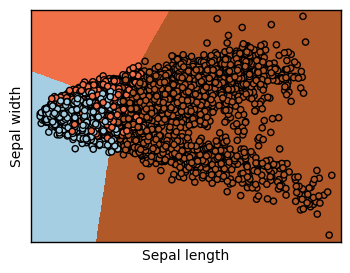

Confusion matrix, without normalization
[[748   4   9]
 [ 11 436  10]
 [  4   8 770]]
Normalized confusion matrix
[[ 0.98  0.01  0.01]
 [ 0.02  0.95  0.02]
 [ 0.01  0.01  0.98]]


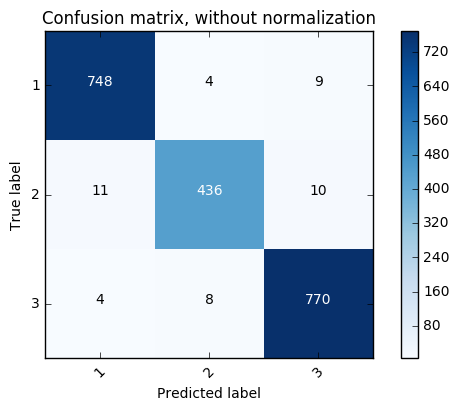

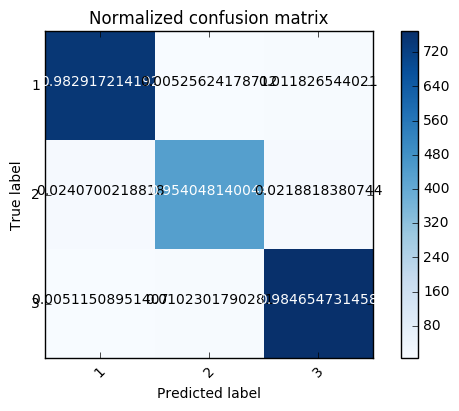

In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

from sklearn import metrics, linear_model, datasets, preprocessing
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale 
from time import time

#Gera uma amostra de 8000 registros
#Este script tem o proposito de gerar imagens ilustrativas para compor o trabalho de conclusao
#Essas imagens vao auxiliar na explicacao dos conceitos

con = sqlite3.connect("database.sqlite")
df = pd.read_sql_query("""SELECT 
funded_amnt ,
funded_amnt_inv,
loan_amnt ,
cast (replace( term, ' months', '' ) as FLOAT) as term_float,
cast (replace( int_rate, '%', '' ) as FLOAT) as int_rate_float,
installment ,
annual_inc ,
dti ,
delinq_2yrs ,
inq_last_6mths ,
open_acc ,
pub_rec ,
revol_bal ,
total_acc ,
out_prncp ,
out_prncp_inv,
total_pymnt ,
total_pymnt_inv,
total_rec_prncp ,
total_rec_int ,
total_rec_late_fee ,
recoveries ,
collection_recovery_fee ,
last_pymnt_amnt from loan WHERE
funded_amnt IS NOT NULL AND
loan_amnt IS NOT NULL AND
term_float IS NOT NULL AND
int_rate_float IS NOT NULL AND
installment IS NOT NULL AND
emp_length IS NOT NULL AND
annual_inc IS NOT NULL AND
dti IS NOT NULL AND
delinq_2yrs IS NOT NULL AND
inq_last_6mths IS NOT NULL AND
open_acc IS NOT NULL AND
pub_rec IS NOT NULL AND
revol_bal IS NOT NULL AND
total_acc IS NOT NULL AND
out_prncp IS NOT NULL AND
total_pymnt IS NOT NULL AND
total_rec_prncp IS NOT NULL AND
total_rec_int IS NOT NULL AND
total_rec_late_fee IS NOT NULL AND
recoveries IS NOT NULL AND
collection_recovery_fee IS NOT NULL AND
last_pymnt_amnt IS NOT NULL limit 8000
""", con)




np.random.seed(42)

data = scale(df)


reduced_data = preprocessing.normalize(data)

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_data)


# import some data to play with

X = reduced_data
y = kmeans.labels_
class_names = ['1', '2', '3']


# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)



# import some data to play with

data = scale(df)

reduced_data = PCA(n_components=2).fit_transform(data)

X = reduced_data
Y = kmeans.labels_

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


class_names = ['1', '2', '3']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=0)

# we create an instance of Neighbours Classifier and fit the data.
y_pred = logreg.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.savefig('confusionMatrixRegLog.png', bbox_inches='tight')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()